In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:85% !important; }</style>'))

inspired by post:
https://towardsdatascience.com/natural-language-processing-using-stanfords-corenlp-d9e64c1e1024

download nlpcore directly:  - https://stanfordnlp.github.io/CoreNLP/

click big red button and run the code indicated here on download (you need to be running your terminal from this directory):  - https://towardsdatascience.com/natural-language-processing-using-stanfords-corenlp-d9e64c1e1024 (this is the same link as in the cell above)

The code below just follows on from this: 



Starting the Server and Installing Python API

In order to be able to use CoreNLP, you will have to start the server. Doing so is pretty easy as all you have to do is to move into the folder created in step I and use Java to run CoreNLP. 

run from command line within the stanford-corenlp-full-2018-10-05
> java -mx6g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000

...to run the server, we use Java. The parameter -mx6g specifies the amount of memory that CoreNLP is allowed to use. In this case, it’s six gigabytes. The -timeout 5000 parameter specifies the timeout in milliseconds.

Now, you should see something like this:
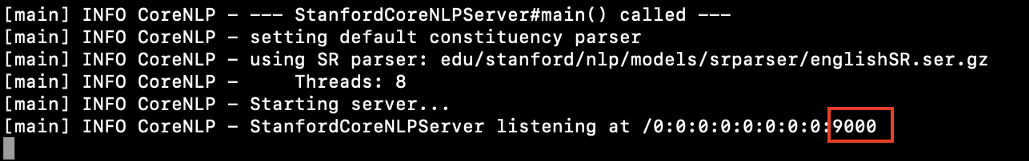

The number highlighted is going to be important when using CoreNLP in Python.

The last thing needed before starting to analyze text is to install a Python API:

> pip install pycorenlp


In [1]:
from pycorenlp import StanfordCoreNLP
# the local host socket should be the last 4 digits indicated in the red box above
nlp = StanfordCoreNLP('http://localhost:9000')

# reboot - triples only - from annotated gold

In [2]:
import pandas as pd
import glob
import os

In [5]:
import pandas as pd
full_df =pd.read_json('../../Data/294_triples_only.json', encoding = 'utf-8')

In [6]:
full_df

,File_ID,attrib_source,attrib_cue,attrib_content
0,21st-Century-Wire_20170627T181355,"[ Big Pharma, 21st Century Wire, that, the ...","[declare, say, question, announce, claim, say,...","[ war on vaccine dissent, In early 2015 , Big..."
1,@berkeleywellness_20170709T195101,"[ those numbers, He, He, you, a little six...","[tell, find, write, put, say, fear, convince, ...","[ What, that some elementary schools had vacc..."
2,ABC-News_20170511T203024,"[ the CDC, outbreaks of vaccine-preventable d...","[find, reveal, report, say, say, consider, rec...",[ other vaccination rates fell below its targe...
3,acsh-org_20170607T114623,"[ De Niro, a letter, I, I a letter, the Ca...","[question, discuss, write, offer, show, write,...","[ the decision, the abundance of science behi..."
4,Activist-Post_20170704T090503,"[ the evidence, we, I, those who, we, The...","[reveal, say, write, refuse, know, conclude, c...",[ a failing measles vaccine is behind the outb...
...,...,...,...,...
289,World-Health-Organization_20161127T044327,"[ Dogs, children, Immediate vaccination and ...","[contribute, report, require, require, show, u...","[ up to 99 % of all rabies transmissions, bit..."
290,World-Health-Organization_20170102T021727,[],[],[]
291,World-Health-Organization_20170403T184820,"[ they, Scientific evidence, Seasonal influe...","[put, show, offer, suggest]","[ the immunized person, that giving several v..."
292,World-Health-Organization_20170419T052836,[],[],[]


In [7]:
# make a tuple from the dataframe
attrib_content_lol=full_df[['File_ID', 'attrib_content']].apply(tuple, axis=1)

running the following code will take some time (a couple of minutes depending on internet connection)

In [ ]:
stanford_output = {}

for file_id, attr_content in attrib_content_lol:
    list_of_sentiment=[]
    
    for phrase in attr_content:
        try:
            result = nlp.annotate(phrase,
                           properties={
                               'annotators': 'sentiment',
                               'outputFormat': 'json',
                               'timeout': 2000,
                           })

        except:
            print('an issue in the first for loop : \n\n', phrase)

#         # extracting only sentiment value (not useful at this stage but maybe to add
  
        try: 
            for s in result["sentences"]:
                stanf_anlys =  (s["sentiment"])
                list_of_sentiment.append((stanf_anlys))
        except:
            print('an issue in the second for loop : \n\n', phrase)
            
    stanford_output[file_id] = list_of_sentiment


an issue in the second for loop : 

  Incomplete vaccination coverage is not a valid explanation for the Quebec City measles outbreak .4 1991-1992 , Rio de Janeiro , Brazil : According to an article published in the journal Revista da Sociedade Brasileira de Medicina Tropical , in a measles outbreak from March 1991 to April 1992 in Rio de Janeiro , 76.4 % of those suspected to be infected had received measles vaccine before their first birthday .5 1992 , Cape Town , South Africa : According to an article published in the South African Medical Journal in 1994 , “ [ In ] August 1992 an outbreak occurred , with cases reported at many schools in children presumably immunised
an issue in the second for loop : 

  the following graph is some support for the success of diphtheria vaccination [ see blue line ] : - [ Click Graph to Enlarge – Opens In New Window ] Notice how overall infant mortality was unaffected [ green and purple lines ]
an issue in the second for loop : 

  that when doctors

In [55]:
# was just sentiment - to calculate frequency, now is sentiment and phrase
stanford_output

{'21st-Century-Wire_20170627T181355': ['Neutral',
  'Negative',
  'Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Negative',
  'Negative',
  'Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Negative',
  'Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Negative',
  'Neutral',
  'Neutral',
  'Negative',
  'Neutral',
  'Neutral'],
 '@berkeleywellness_20170709T195101': ['Neutral',
  'Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Negative',
  'Neutral',
  'Neutral',
  'Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Negative',
  'Neutral',
  'Neutral',
  'Positive',
  'Positive',
  'Neutral',
  'Neutral'],
 'ABC-News_20170511T203024': ['Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Negative',
  'Positive',
  'Neutral',
  'Negative',
  'Neutral',
  'Neutral',
  'Neutral',
  'Neutral',
  'Positive',
  'Po

In [71]:
# calculate frequencies per document
from collections import defaultdict

outer_dict={}

for key, values in stanford_output.items():
    
    inner_dict = defaultdict(int)

    for value in values:
        inner_dict[value]+=1
    outer_dict[key] = inner_dict

In [72]:
outer_dict

{'21st-Century-Wire_20170627T181355': defaultdict(int,
             {'Neutral': 19, 'Negative': 9}),
 '@berkeleywellness_20170709T195101': defaultdict(int,
             {'Neutral': 20, 'Negative': 4, 'Positive': 2}),
 'ABC-News_20170511T203024': defaultdict(int,
             {'Negative': 3, 'Neutral': 8, 'Positive': 3}),
 'acsh-org_20170607T114623': defaultdict(int, {'Neutral': 6, 'Negative': 4}),
 'Activist-Post_20170704T090503': defaultdict(int,
             {'Negative': 8, 'Neutral': 5}),
 'AGE-OF-AUTISM_20170620T044415': defaultdict(int,
             {'Neutral': 98,
              'Negative': 56,
              'Positive': 6,
              'Verynegative': 1}),
 'aids-gov_20170513T020021': defaultdict(int, {'Neutral': 2, 'Negative': 1}),
 'Ars-Technica_20170629T055731': defaultdict(int,
             {'Negative': 5, 'Neutral': 1, 'Positive': 1}),
 'Ars-Technica_20171003T014942': defaultdict(int,
             {'Negative': 5, 'Neutral': 6, 'Positive': 3}),
 'Atlas-Monitor_20160703T084322

In [73]:
# to account for null values in the data
for key, value in outer_dict.items():
    if value == {}:
        outer_dict[key].update({'Neutral':0})

In [60]:
# cast inner dict(sentiment) to dataframe columns
df = pd.DataFrame(outer_dict.items(), columns=['File_ID', 'Stanford_sentiment'])
new_df = df.Stanford_sentiment.apply(pd.Series)

In [65]:
#simplify stanford sentiment labels and merge with File_ID
new_df['stanford_pos'] = new_df.loc[:,['Positive','Verypositive']].sum(axis=1)
new_df['stanford_neg'] = new_df.loc[:,['Negative','Verynegative']].sum(axis=1)
new_df.drop(['Verynegative', 'Verypositive', 'Negative', 'Positive'], axis=1, inplace= True)
sentiment_df = pd.merge(df, new_df, left_index=True, right_index=True)

In [74]:
#inspection
sentiment_df

,File_ID,Stanford_sentiment,stanford_neutral,stanford_pos,stanford_neg
0,21st-Century-Wire_20170627T181355,"{'Neutral': 19, 'Negative': 9}",19.0,0.0,9.0
1,@berkeleywellness_20170709T195101,"{'Neutral': 20, 'Negative': 4, 'Positive': 2}",20.0,2.0,4.0
2,ABC-News_20170511T203024,"{'Negative': 3, 'Neutral': 8, 'Positive': 3}",8.0,3.0,3.0
3,acsh-org_20170607T114623,"{'Neutral': 6, 'Negative': 4}",6.0,0.0,4.0
4,Activist-Post_20170704T090503,"{'Negative': 8, 'Neutral': 5}",5.0,0.0,8.0
...,...,...,...,...,...
289,World-Health-Organization_20161127T044327,"{'Neutral': 5, 'Positive': 1}",5.0,1.0,0.0
290,World-Health-Organization_20170102T021727,{'Neutral': 0},0.0,0.0,0.0
291,World-Health-Organization_20170403T184820,"{'Neutral': 3, 'Negative': 1}",3.0,0.0,1.0
292,World-Health-Organization_20170419T052836,{'Neutral': 0},0.0,0.0,0.0


In [75]:
sentiment_df.columns=['File_ID', 'Stanford_sentiment', 'stanford_neutral', 'stanford_pos', 'stanford_neg']

Export df as json file

In [ ]:
sentiment_df.to_json('sent_analysis_294.json')

# evaluating the gold annotated data 

this code sends the lines of annotated sentiment/ stance attribution content to be processed by Stanford CoreNLP and adds the stanford results in a separate column 

- need the path to the gold stance/sentiment annotated files. 

In [3]:
for filename in glob.glob('course_annotations/*/*/*.tsv'):
    text = ''
    try:
        # encoding issues are common - latin-1 is a possible alternative
        with open (filename, 'r', encoding = 'utf-8') as infile:
            rows = infile.readlines()
            columns = [element.strip().split('\t') for element in rows]
            columns[0].append('stanford_out')
            for line in columns[1:]:
                content = line[3]
                try:
                    result = nlp.annotate(content,
                                   properties={
                                       'annotators': 'sentiment',
                                       'outputFormat': 'json',
                                       'timeout': 2000,
                                   })

                except:
                    print('an issue in the first for loop : \n\n', content)

        #   extract sentiment from dictionary returned  
                try: 
                    for s in result["sentences"]:
                        stanf_anlys =  (s["sentiment"])
                        if stanf_anlys == 'Neutral':
                            line.append('neutral')
                        # aligning labels
                        elif any([stanf_anlys == 'Positive', stanf_anlys =='Verypositive']):
                            line.append('positive')
                        else:
                            line.append('negative')
                except:
                    print('an issue in the second for loop : \n\n', content)
                    line.append('cannot be analysed by stanford')

    #writing out the files with appended column
    except:
        print(filename)
        
    for stanfordised in columns:
        tsv_row = '\t'.join(stanfordised)+'\n'
        text+=tsv_row
    try:
        with open (filename,'w') as outfile:
            outfile.write(text)
    except:
        print(filename)

an issue in the second for loop : 

  “ In the 1950 ’s , it was first recognised that dietary fat could contribute to cardiovascular diseases in the Western World . However , the Greenland Eskimos were known to eat large amounts of fat but still had a very low incidence of cardiovascular disease . In the 1970ies , Bang and Dyerberg found that the Eskimos had low levels of cholesterol and lipoproteins , except for the high-density lipoproteins that is [ sic ] now known as “ the good cholesterol … quality of dietary fat rather than quantity is important for development of cardiovascular disease ”
an issue in the second for loop : 

  that the Eskimos had low levels of cholesterol and lipoproteins , except for the high-density lipoproteins that is [ sic ] now known as “ the good cholesterol … quality of dietary fat rather than quantity is important for development of cardiovascular disease
course_annotations\group1\ann1\International-Medical-Council-on-Vaccination_20170701T172125.attribut

course_annotations\group7\ann1ann2-adjudicated\reasonable-hank_20170912T094538.attribut.tsv
an issue in the second for loop : 

 "\"" The vaccines tested by Moms Across America and shown to contain glyphosate were the following : - DTAp Adacel ( Sanofi Pasteur ) vaccine , which had .123 parts per billion of glyphosate - Influenza Fluvirin ( Novaris ) , which came in at .331 ppb of glyphosate - HepB Energix-B ( Glaxo Smith Kiline , at .325 ppb of glyphosate - Pneumonoccal Vax Polyvalent Pneumovax 23 ( Merk ) , which had .107 ppb of glyphosate - MMR II ( Merck ) vaccine , at 2.671 ppb of glyphosate . \"""
course_annotations\group7\ann1ann2-adjudicated\Science-Based-Medicine_20170701T065108.attribut.tsv
course_annotations\group7\ann2\PBS-NewsHour_20161202T134302.attribut.tsv
an issue in the second for loop : 

 " \"" The vaccines tested by Moms Across America and shown to contain glyphosate were the following : - DTAp Adacel ( Sanofi Pasteur ) vaccine , which had .123 parts per billion of